<pre>
1. 삼성전자의 최근 10일간의 주식 가격을 분석하려고 한다.
  - 삼성전자 주식 코드는 “005930” 이다.
  - 네이버 주식 일별시세의 삼성전자 url 주소는 다음과 같다.
  	=> https://finance.naver.com/item/sise_day.nhn?code=005930&page=1
  - 예시 화면 : @2022.4.22

2. 작업 순서
  - 이 사이트의 내용을 웹크롤링으로 읽어와서, 전체 내용을 DataFrame으로 저장한다.
  - 데이터 전처리를 한다.
  - 데이터 시각화를 한다.

3. 웹 크롤링 수집 준비를 한다.
  - user agent 등을 설정한다.

4. 데이터 전처리
  - 숫자 데이터의 콤마를 없앤다.
  - 숫자 형식의 문자열을 숫자 데이터로 변환한다.

5. 데이터 시각화 
  - 그래픽 기본 설정을 한다. (한글, 폰트 크기, 그래프창 크기)
  - DataFrame 데이터에서 종가만 추출하여 선그래프를 그린다.
    => x축에는 “날짜”을 표시한다.
    => y축에는 “금액”을 표시한다.
    => 타이틀에는 “삼성전자 날짜별 주가 상황”을 표시한다.
    => x축 tick문자는 날짜를 표시한다.
</pre>

<pre>
웹 크롤링
</pre>

In [37]:
# 필요한 모듈을 임포트하였는가?
import warnings
warnings.filterwarnings('ignore')

# 크롤링
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import re, time
from tqdm.notebook import tqdm

#데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams.update({
    'text.color': 'gray',
    'axes.labelcolor': 'gray',
    'xtick.color': 'gray',
    'ytick.color': 'gray'
})

In [38]:
# user_agent 등의 웹 크롤링을 위한 수집준비를 하였는가?
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [39]:
# BeautifulSoup으로 본문을 추출하였는가?
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [40]:
trs = soup.select('.type2 > tbody > tr')
trs = trs[2:7] + trs[-6:-1]

In [41]:
tr = trs[0]
# 날짜
date = tr.select_one('.tah.p10.gray03').get_text()
date

'2022.04.29'

In [42]:
# ‘종가’ 데이터만 추출하였는가?

# 데이터 전처리로 금액사이의 콤마를 제거하였는가?
price = tr.select_one('.tah.p11').get_text()
# 데이터 전처리로 DataFrame의 숫자형식의 
# 문자열 데이터를 숫자로 변환하였는가?
price = int(re.sub('[^0-9]', '', price))
price

67400

In [43]:
lines = []
for tr in tqdm(trs):
    date = tr.select_one('.tah.p10.gray03').get_text()
    price = tr.select_one('.tah.p11').get_text()
    price = int(re.sub('[^0-9]', '', price))
    lines.append([date, price])
driver.close()

  0%|          | 0/10 [00:00<?, ?it/s]

<pre>
사이트의 내용을 DataFrame으로 저장을 하였는가?
“날짜” 컬럼을 DataFrame의 인덱스로 변환하였는가?
</pre>

In [47]:
df = pd.DataFrame(lines, columns=['날짜', '종가'])
df.set_index(['날짜'], inplace=True)
df.sort_index(ascending=True, inplace=True)
df

,종가
날짜,
2022.04.18,66700
2022.04.19,67300
2022.04.20,67400
2022.04.21,67700
2022.04.22,67000
2022.04.25,66300
2022.04.26,66100
2022.04.27,65000
2022.04.28,64800


<pre>
Dataframe 시각화
</pre>

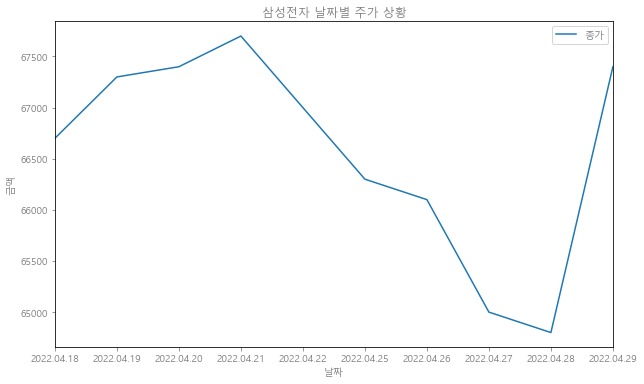

In [48]:
# 그래프의 기본 설정은 하였는가?
df.plot(figsize=(10,6))

# 그래프에 타이틀, x축, y축 라벨 문자와 x축에 날짜를 모두 출력하였는가?
plt.title('삼성전자 날짜별 주가 상황')

# 날짜와 종가로 선그래프를 그렸는가?
plt.xlabel('날짜'), plt.ylabel('금액')
plt.show()